Arturo Fornes (A01227071)

Gerardo Juarez (A00226860)

Miguel Montoya (A01226045)

David Arana (A01630076)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
import seaborn as sns

In [2]:
dataset = pd.read_csv("./TrainingSet.csv")
print(dataset.shape)
dataset.head()

(1000000, 27)


,Unnamed: 0,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,y
0,0,0.588131,0.897714,0.891531,0.815837,0.035890,0.691758,0.378681,0.518511,0.657951,...,0.116694,0.751281,0.239218,0.254806,0.857626,0.949779,0.561687,0.178781,0.770252,21.365159
1,1,0.492381,0.631253,0.839498,0.461039,0.497940,0.679411,0.650786,0.268795,0.067325,...,0.557450,0.318580,0.394843,0.257975,0.582241,0.161629,0.598134,0.825824,0.156392,17.690477
2,2,0.734301,0.408643,0.778688,0.803971,0.786071,0.592287,0.664489,0.646567,0.425636,...,0.379806,0.291892,0.557229,0.084164,0.631282,0.944570,0.891238,0.878583,0.344752,21.614810
3,3,0.703101,0.527338,0.659317,0.268291,0.607767,0.048157,0.695501,0.299272,0.165636,...,0.838894,0.035537,0.121444,0.891008,0.515092,0.924419,0.581243,0.773256,0.422677,15.416523
4,4,0.825465,0.385405,0.354346,0.428079,0.395065,0.844630,0.373824,0.371581,0.415943,...,0.806797,0.354995,0.084638,0.731169,0.996601,0.009593,0.237573,0.461925,0.765259,15.092202


In [3]:
X = dataset.iloc[:, 1:26].values
y = dataset.iloc[:, 26].values

In [4]:
sample = dataset.sample(frac=1/70)

In [5]:
sample.shape
sX = sample.iloc[:, 1:26].values
sy = sample.iloc[:, 26].values

In [6]:
sX_opt = sX[:, list(range(24))]
regressor_OLS = sm.OLS(endog = sy, exog = sX_opt).fit()

In [7]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 2.254e+04
Date:                Fri, 15 Mar 2019   Prob (F-statistic):               0.00
Time:                        19:24:44   Log-Likelihood:                -33008.
No. Observations:               14286   AIC:                         6.606e+04
Df Residuals:                   14262   BIC:                         6.625e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             6.7019      0.069     96.955      0.000       6.566       6.837
x2             6.7879      0.069     98.249      0.000       6.652       6.923
x3            -0.0532      0.069     -0.775      0.438      -0.188       0.081
x4             9.9343      0.069    143.211      0.000       9.798      10.070
x5             4.9432      0.070     71.003      0.000       4.807       5.080
x6             0.0166      0.069      0.240      0.810      -0.119       0.152
x7             0.1629      0.069      2.356      0.018       0.027       0.298
x8             0.0423      0.069      0.610      0.542      -0.094       0.178
x9             0.0332      0.069      0.480      0.631      -0.102       0.169
x10            0.1022      0.069      1.480      0.139      -0.033       0.238
x11            0.0107      0.069      0.155      0.877      -0.124       0.146
x12            0.0538      0.070      0.773      0.440      -0.083       0.190
x13           -0.0084      0.069     -0.122      0.903      -0.144       0.127
x14            0.0588      0.070      0.846      0.398      -0.078       0.195
x15           -0.0378      0.069     -0.548      0.584      -0.173       0.097
x16            0.0495      0.070      0.707      0.480      -0.088       0.187
x17            0.1517      0.069      2.191      0.028       0.016       0.287
x18           -0.1005      0.070     -1.443      0.149      -0.237       0.036
x19           -0.0038      0.070     -0.054      0.957      -0.141       0.133
x20            0.0097      0.070      0.139      0.889      -0.127       0.146
x21            0.0343      0.069      0.497      0.619      -0.101       0.169
x22            0.0651      0.070      0.930      0.352      -0.072       0.202
x23           -0.0824      0.070     -1.183      0.237      -0.219       0.054
x24           -0.0154      0.070     -0.221      0.825      -0.152       0.121
==============================================================================
Omnibus:                     1215.622   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2144.869
Skew:                          -0.611   Prob(JB):                         0.00
Kurtosis:                       4.452   Cond. No.                         8.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
index_clean = [0,1,3,4,21]
X_clean = sX[:, index_clean]

In [9]:
regressor_OLS = sm.OLS(endog = sy, exog = X_clean).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 1.081e+05
Date:                Fri, 15 Mar 2019   Prob (F-statistic):               0.00
Time:                        19:24:44   Log-Likelihood:                -33021.
No. Observations:               14286   AIC:                         6.605e+04
Df Residuals:                   14281   BIC:                         6.609e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             6.7820      0.063    106.809      0.000       6.658       6.906
x2             6.8619      0.064    107.354      0.000       6.737       6.987
x3            10.0147      0.063    157.728      0.000       9.890      10.139
x4             5.0215      0.064     78.420      0.000       4.896       5.147
x5             0.1503      0.064      2.345      0.019       0.025       0.276
==============================================================================
Omnibus:                     1287.572   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2324.506
Skew:                          -0.633   Prob(JB):                         0.00
Kurtosis:                       4.518   Cond. No.                         4.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We decided to ignore the features that had a p-value bigger than 0.05. After the first deletion, all the remaining features still had a p-value lesser than 0.05.

In [10]:
x_train, x_test, y_train, y_test  = train_test_split(sample.iloc[:, 1:26],sample.iloc[:, 26], test_size=0.2)

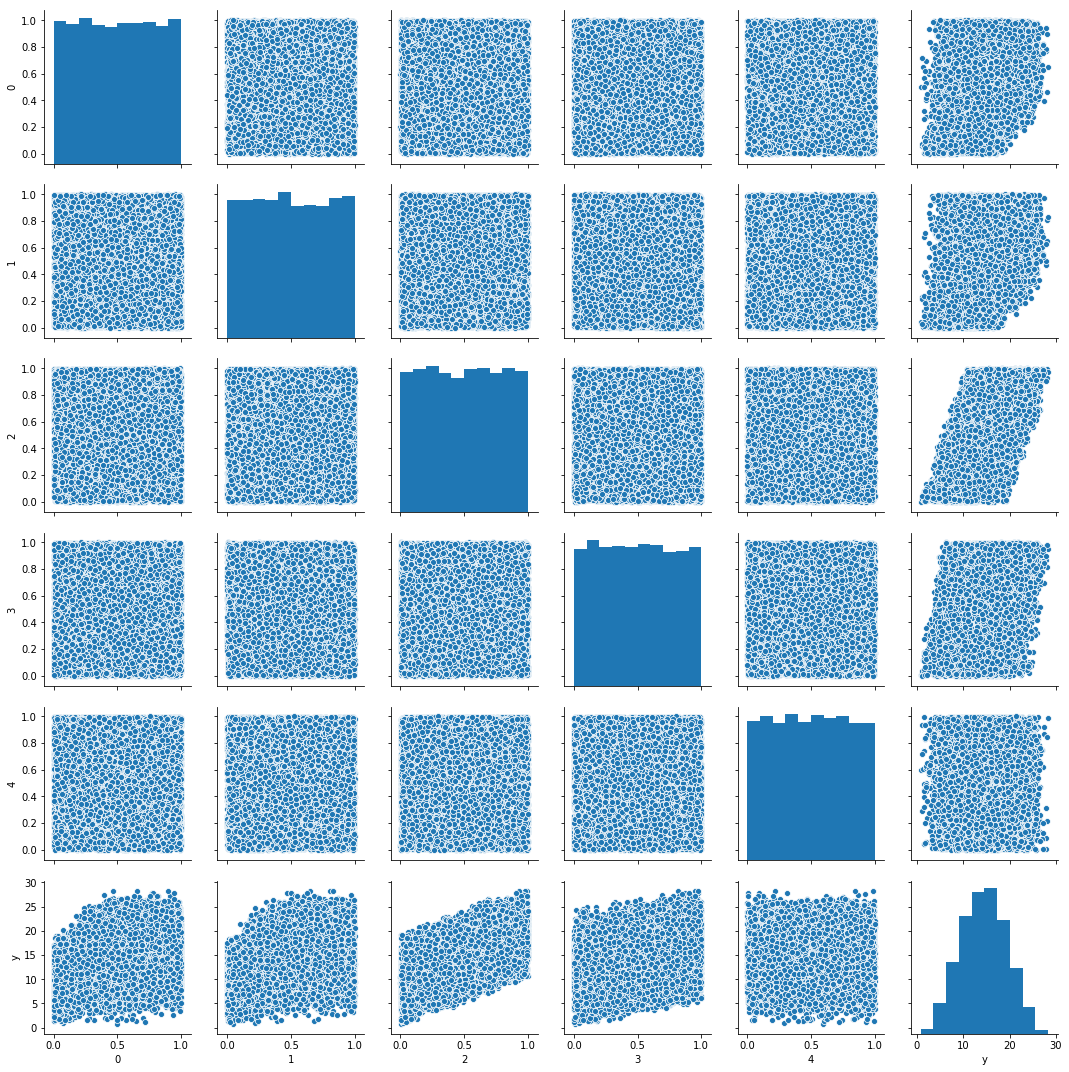

In [11]:
trainedDF = pd.DataFrame(data=X_clean)
trainedDF["y"] = sy
sns.pairplot(trainedDF)

We can observe that the feature 4 has the lower correlation with y. The best feature would be feature 2.